# MMS Data in Python with pySPEDAS

Eric Grimes, egrimes@igpp.ucla.edu

December 4, 2019

Notes: 
* this webinar will be recorded and posted to Youtube
* all of this is still beta

### Getting Started

Note: Python 3.5+ is required

To install the latest pySPEDAS:

`pip install pyspedas --upgrade`

or

`conda install -c spedas pyspedas`

### Tentative agenda:

- Introduction to the load routines and configuration options
- Ephemeris/Coordinates data
- FIELDS data, including curlometer calculations
- ASPOC data
- EPD (FEEPS/EIS) data, including pitch angle distributions
- Plasma (FPI/HPCA) data

Note: all of this depends heavily on the hard work of the pyTplot development team at LASP:

https://github.com/MAVENSDC/PyTplot

https://pytplot.readthedocs.io/en/latest/

In [1]:
from pytplot import tplot

## Introduction to the load routines and configuration options

The MMS load routines are simple functions with options set via keywords. If the data files don't exist locally, they're downloaded from the SDC or your network mirror. 

The available load routines are:

- Fluxgate Magnetometer (fgm)
- Search-coil Magnetometer (scm)
- Combined FGM+SCM data (fsm)
- Electric field Double Probe (edp)
- Electron Drift Instrument (edi)
- Fast Plasma Investigation (fpi)
- Hot Plasma Composition Analyzer (hpca)
- Energetic Ion Spectrometer (eis)
- Fly's Eye Energetic Particle Sensor (feeps)
- Active Spacecraft Potential Control (aspoc)
- Digital Signal Processor (dsp)
- Ephemeris and Coordinates (mec)

You can import the load routines from the `mms` module by their name, e.g., 



In [2]:
from pyspedas.mms import mec

If you prefer the IDL syntax, you can import the load routines using their IDL names, e.g., 

In [3]:
from pyspedas import mms_load_mec

The first time you run a load routine, you'll probably be prompted for a username/password. Leave these blank if you don't have an SDC username/password. 

If you've previously saved an SDC username/password with IDL, pySPEDAS should find and use those credentials.

### Configuration options

Global configuration options are set in the `CONFIG` dictionary in `mms_config.py`

* `local_data_dir`: your local data directory; can also be set with the `MMS_DATA_DIR` environment variable (ideal)

* `mirror_data_dir`: read-only network mirror

* `download_only`: download the data, but don't load the files into pyTplot variables

* `no_download`: don't contact the SDC; only load the files if they exist on the network mirror or in your local data directory

### Load routine options

* `trange`: two-element array specifying the time range in UT; accepts a wide variety of formats, including datetime objects

* `probe`: spacecraft probe # (int, str or list of ints or strs)

* `level`: data level (str or list of strs)

* `data_rate`: instrument data rate (str or list of strs)

* `datatype`: instrument datatype (str or list of strs)

* `time_clip`: if `True`, time clip the data after loading the pyTplot variables

* `varformat`: limit the variables loaded from the CDF files (str)

* `get_support_data`: if `True`, load `support_data` data from the CDF files

* `suffix`: append a suffix to the loaded variables (str)

* `available`: if `True`, only return a list of available data files from the SDC (no downloading)

* `no_update`: if `True`, only load local or mirror data

* `notplot`: if `True`, return the CDF data in `numpy` arrays instead of creating pyTplot variables

* `cdf_version`: load only a specific CDF version (str)

* `min_version`: set a minimum CDF version to load (str)

* `latest_version`: if `True`, only load the latest CDF version (i.e., X.Y.Z have to match)

* `major_version`: if `True`, load the latest major CDF version (i.e., latest X in X.Y.Z)

* `center_measurement`: (FPI and HPCA only) if `True`, center the measurement to the middle of the accumulation interval 
 

Notes: 
- all options have defaults (e.g., probe 1, fast survey L2 data are loaded by default)
- some load routines have additional options; all should be documented in the docstrings - use `help` to see all options

## Ephemeris/Coordinates data

https://lasp.colorado.edu/mms/sdc/public/datasets/mec/

To get started, load the MMS1 spacecraft position and velocity data in GSE coordinates for October 16, 2015

In [4]:
mec_vars = mec(trange=['2015-10-16', '2015-10-17'], suffix='_suffix')

04-Dec-19 10:11:51: Loading /Volumes/data/data/mms/mms1/mec/srvy/l2/ephts04d/2015/10/mms1_mec_srvy_l2_ephts04d_20151016_v2.0.0.cdf


Loaded variables:
mms1_mec_dipole_tilt_suffix
mms1_mec_gmst_suffix
mms1_mec_mlat_suffix
mms1_mec_mlt_suffix
mms1_mec_l_dipole_suffix
mms1_mec_quat_eci_to_bcs_suffix
mms1_mec_quat_eci_to_dbcs_suffix
mms1_mec_quat_eci_to_dmpa_suffix
mms1_mec_quat_eci_to_smpa_suffix
mms1_mec_quat_eci_to_dsl_suffix
mms1_mec_quat_eci_to_ssl_suffix
mms1_mec_L_vec_suffix
mms1_mec_Z_vec_suffix
mms1_mec_P_vec_suffix
mms1_mec_L_phase_suffix
mms1_mec_Z_phase_suffix
mms1_mec_P_phase_suffix
mms1_mec_kp_suffix
mms1_mec_dst_suffix
mms1_mec_earth_eclipse_flag_suffix
mms1_mec_moon_eclipse_flag_suffix
mms1_mec_r_eci_suffix
mms1_mec_v_eci_suffix
mms1_mec_r_gsm_suffix
mms1_mec_v_gsm_suffix
mms1_mec_quat_eci_to_gsm_suffix
mms1_mec_r_geo_suffix
mms1_mec_v_geo_suffix
mms1_mec_quat_eci_to_geo_suffix
mms1_mec_r_sm_suffix
mms1_mec_v_sm_suffix
mms1_mec_quat_eci_to_sm_suffix
mms1_mec_r_gse_suffix
mms1_mec_v_gse_suffix
mms1_mec_quat_eci_to_gse_suffix
mms1_mec_r_gse2000_suffix
mms1_mec_v_gse2000_suffix
mms1_mec_quat_eci_to_gse2000_

To list the variables that were loaded, use `tplot_names`, e.g., 

In [5]:
from pytplot import tplot_names

In [7]:
tnames = tplot_names()

0 : mms1_mec_dipole_tilt_suffix
1 : mms1_mec_gmst_suffix
2 : mms1_mec_mlat_suffix
3 : mms1_mec_mlt_suffix
4 : mms1_mec_l_dipole_suffix
5 : mms1_mec_quat_eci_to_bcs_suffix
6 : mms1_mec_quat_eci_to_dbcs_suffix
7 : mms1_mec_quat_eci_to_dmpa_suffix
8 : mms1_mec_quat_eci_to_smpa_suffix
9 : mms1_mec_quat_eci_to_dsl_suffix
10 : mms1_mec_quat_eci_to_ssl_suffix
11 : mms1_mec_L_vec_suffix
12 : mms1_mec_Z_vec_suffix
13 : mms1_mec_P_vec_suffix
14 : mms1_mec_L_phase_suffix
15 : mms1_mec_Z_phase_suffix
16 : mms1_mec_P_phase_suffix
17 : mms1_mec_kp_suffix
18 : mms1_mec_dst_suffix
19 : mms1_mec_earth_eclipse_flag_suffix
20 : mms1_mec_moon_eclipse_flag_suffix
21 : mms1_mec_r_eci_suffix
22 : mms1_mec_v_eci_suffix
23 : mms1_mec_r_gsm_suffix
24 : mms1_mec_v_gsm_suffix
25 : mms1_mec_quat_eci_to_gsm_suffix
26 : mms1_mec_r_geo_suffix
27 : mms1_mec_v_geo_suffix
28 : mms1_mec_quat_eci_to_geo_suffix
29 : mms1_mec_r_sm_suffix
30 : mms1_mec_v_sm_suffix
31 : mms1_mec_quat_eci_to_sm_suffix
32 : mms1_mec_r_gse_suffi

Now plot the position and velocity

In [8]:
tplot(['mms1_mec_r_gse_suffix', 'mms1_mec_v_gse_suffix'])

Use `get_data` to take the data out of a pyTplot variable and store it into numpy arrays

In [9]:
from pytplot import get_data

In [10]:
times, pos_values = get_data('mms1_mec_r_gse_suffix')

The `times` values are unix times

In [11]:
times[0:5]

array([1.44495360e+09, 1.44495363e+09, 1.44495366e+09, 1.44495369e+09,
       1.44495372e+09])

and the position values are in km

In [13]:
pos_values[0, :]

array([-4790.58770764, -6097.00841809,   530.77191077])

Set the `xarray` keyword to `True` to return the internal `xarray` object instead

In [14]:
pos_xr = get_data('mms1_mec_r_gse_suffix', xarray=True)

In [15]:
pos_xr

<xarray.DataArray 'mms1_mec_r_gse_suffix' (time: 2880, v: 3)>
array([[-4790.587708, -6097.008418,   530.771911],
       [-4573.966493, -6286.58844 ,   558.536668],
       [-4353.882641, -6471.410786,   585.87348 ],
       ...,
       [-2650.541192, -7702.488472,   783.95404 ],
       [-2410.885478, -7846.838866,   806.678521],
       [-2169.687613, -7986.176627,   828.88314 ]])
Coordinates:
  * time     (time) float64 1.445e+09 1.445e+09 ... 1.445e+09 1.445e+09
Dimensions without coordinates: v
Attributes:
    plot_options:  {'xaxis_opt': {'axis_label': 'Time', 'crosshair': 'X', 'x_...

Use `store_data` to create a pyTplot variable using numpy arrays

In [16]:
from pytplot import store_data

In [17]:
store_data('gse_pos_var', data={'x': times, 'y': pos_values/6371.2})

In [18]:
tplot('gse_pos_var')

Use `options` to set plot metadata

In [19]:
from pytplot import options

In [20]:
options('gse_pos_var', 'legend_names', ['X (Re)', 'Y (Re)', 'Z (Re)'])

In [21]:
options('gse_pos_var', 'ytitle', 'MMS1 position in GSE')

In [24]:
tplot('gse_pos_var')

### Orbit plots

To create an orbit plot using `matplotlib`:

04-Dec-19 10:17:04: Loading /Volumes/data/data/mms/mms1/mec/srvy/l2/ephts04d/2015/10/mms1_mec_srvy_l2_ephts04d_20151016_v2.0.0.cdf
04-Dec-19 10:17:04: Loading /Volumes/data/data/mms/mms2/mec/srvy/l2/ephts04d/2015/10/mms2_mec_srvy_l2_ephts04d_20151016_v2.0.0.cdf
04-Dec-19 10:17:05: Loading /Volumes/data/data/mms/mms3/mec/srvy/l2/ephts04d/2015/10/mms3_mec_srvy_l2_ephts04d_20151016_v2.0.0.cdf
04-Dec-19 10:17:05: Loading /Volumes/data/data/mms/mms4/mec/srvy/l2/ephts04d/2015/10/mms4_mec_srvy_l2_ephts04d_20151016_v2.0.0.cdf
04-Dec-19 10:17:05: /Users/eric/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, 

Time clip returns full data set.
Time clip returns full data set.
Time clip returns full data set.
Time clip returns full data set.
Time clip returns full data set.
Time clip returns full data set.
Time clip returns full data set.
Time clip returns full data set.
Loaded variables:
mms1_mec_r_gse
mms1_mec_r_gse2000
mms2_mec_r_gse
mms2_mec_r_gse2000
mms3_mec_r_gse
mms3_mec_r_gse2000
mms4_mec_r_gse
mms4_mec_r_gse2000


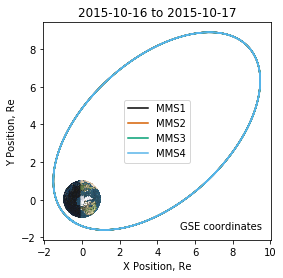

In [26]:
from pyspedas.mms.mms_orbit_plot import mms_orbit_plot
mms_orbit_plot(trange=['2015-10-16', '2015-10-17'])

## FIELDS data

https://lasp.colorado.edu/mms/sdc/public/datasets/fields/

In [27]:
from pyspedas.mms import fgm, scm, edp, edi, dsp

### FGM data

Note: by default, FGM data flagged by the `flag` variable are set to NaN automatically when the data are loaded. To keep these flagged data, set the keyword `keep_flagged` to `True`

In [28]:
fgm_vars = fgm(probe=4, 
               trange=['2015-10-16/13:06', '2015-10-16/13:07'], 
               data_rate='brst', 
               time_clip=True)

04-Dec-19 10:17:56: Loading /Volumes/data/data/mms/mms4/fgm/brst/l2/2015/10/16/mms4_fgm_brst_l2_20151016130524_v4.18.0.cdf


The lengths of x and y do not match!
Time clip was applied to: mms4_fgm_b_gse_brst_l2
Time clip was applied to: mms4_fgm_b_gsm_brst_l2
Time clip was applied to: mms4_fgm_b_dmpa_brst_l2
Time clip was applied to: mms4_fgm_b_bcs_brst_l2
Time clip was applied to: mms4_fgm_flag_brst_l2
Time clip was applied to: mms4_fgm_r_gse_brst_l2
Time clip was applied to: mms4_fgm_r_gsm_brst_l2
Time clip was applied to: mms4_fgm_hirange_brst_l2
Time clip was applied to: mms4_fgm_bdeltahalf_brst_l2
Time clip was applied to: mms4_fgm_stemp_brst_l2
Time clip was applied to: mms4_fgm_etemp_brst_l2
Time clip was applied to: mms4_fgm_mode_brst_l2
Time clip error: No pytplot names were provided.
Loaded variables:
mms4_fgm_b_gse_brst_l2
mms4_fgm_b_gsm_brst_l2
mms4_fgm_b_dmpa_brst_l2
mms4_fgm_b_bcs_brst_l2
mms4_fgm_flag_brst_l2
mms4_fgm_r_gse_brst_l2
mms4_fgm_r_gsm_brst_l2
mms4_fgm_hirange_brst_l2
mms4_fgm_bdeltahalf_brst_l2
mms4_fgm_stemp_brst_l2
mms4_fgm_etemp_brst_l2
mms4_fgm_mode_brst_l2
mms4_fgm_rdeltahalf_

In [29]:
tplot(['mms4_fgm_b_gse_brst_l2', 'mms4_fgm_b_gsm_brst_l2'])

To load the burst mode GSE data from all 4 spacecraft at once:

In [38]:
fgm_vars = fgm(probe=[1, 2, 3, 4], 
               trange=['2015-10-30/05:15:45', '2015-10-30/05:15:48'], 
               data_rate='brst', 
               time_clip=True, 
               varformat='*_gse_*')

04-Dec-19 10:21:28: Loading /Volumes/data/data/mms/mms1/fgm/brst/l2/2015/10/30/mms1_fgm_brst_l2_20151030051444_v4.18.0.cdf
04-Dec-19 10:21:28: Loading /Volumes/data/data/mms/mms2/fgm/brst/l2/2015/10/30/mms2_fgm_brst_l2_20151030051444_v4.18.0.cdf
04-Dec-19 10:21:29: Loading /Volumes/data/data/mms/mms3/fgm/brst/l2/2015/10/30/mms3_fgm_brst_l2_20151030051444_v4.18.0.cdf
04-Dec-19 10:21:29: Loading /Volumes/data/data/mms/mms4/fgm/brst/l2/2015/10/30/mms4_fgm_brst_l2_20151030051444_v4.18.0.cdf


Time clip was applied to: mms1_fgm_b_gse_brst_l2
Time clip was applied to: mms1_fgm_flag_brst_l2
Problem time clipping: mms1_fgm_r_gse_brst_l2
Time clip was applied to: mms2_fgm_b_gse_brst_l2
Time clip was applied to: mms2_fgm_flag_brst_l2
Problem time clipping: mms2_fgm_r_gse_brst_l2
Time clip was applied to: mms3_fgm_b_gse_brst_l2
Time clip was applied to: mms3_fgm_flag_brst_l2
Problem time clipping: mms3_fgm_r_gse_brst_l2
Time clip was applied to: mms4_fgm_b_gse_brst_l2
Time clip was applied to: mms4_fgm_flag_brst_l2
Problem time clipping: mms4_fgm_r_gse_brst_l2
Loaded variables:
mms1_fgm_b_gse_brst_l2
mms1_fgm_r_gse_brst_l2
mms2_fgm_b_gse_brst_l2
mms2_fgm_r_gse_brst_l2
mms3_fgm_b_gse_brst_l2
mms3_fgm_r_gse_brst_l2
mms4_fgm_b_gse_brst_l2
mms4_fgm_r_gse_brst_l2


In [32]:
tplot(['mms1_fgm_b_gse_brst_l2', 
       'mms2_fgm_b_gse_brst_l2', 
       'mms3_fgm_b_gse_brst_l2', 
       'mms4_fgm_b_gse_brst_l2'])

### Curlometer technique

Note: 
* Based on the `mms_curl` code in IDL SPEDAS by Jonathan Eastwood and Tai Phan
* For more info on this method, see: Chanteur, G., Spatial Interpolation for Four Spacecraft: Theory, Chapter 14 of Analysis methods for multi-spacecraft data, G. Paschmann and P. W. Daly (Eds.) ISSI Scientific Report SR-001. 

You can apply the curlometer technique using the `curlometer` function

In [33]:
from pyspedas.mms import curlometer

You'll need to provide the position and B-field variables in GSE coordinates

In [34]:
positions = ['mms1_fgm_r_gse_brst_l2', 'mms2_fgm_r_gse_brst_l2', 'mms3_fgm_r_gse_brst_l2', 'mms4_fgm_r_gse_brst_l2']
fields = ['mms1_fgm_b_gse_brst_l2', 'mms2_fgm_b_gse_brst_l2', 'mms3_fgm_b_gse_brst_l2', 'mms4_fgm_b_gse_brst_l2']

In [39]:
curlometer_vars = curlometer(fields=fields, positions=positions)

tinterpol (linear) was applied to: mms2_fgm_b_gse_brst_l2_i
tinterpol (linear) was applied to: mms3_fgm_b_gse_brst_l2_i
tinterpol (linear) was applied to: mms4_fgm_b_gse_brst_l2_i
tinterpol (linear) was applied to: mms1_fgm_r_gse_brst_l2_i
tinterpol (linear) was applied to: mms2_fgm_r_gse_brst_l2_i
tinterpol (linear) was applied to: mms3_fgm_r_gse_brst_l2_i
tinterpol (linear) was applied to: mms4_fgm_r_gse_brst_l2_i


In [40]:
curlometer_vars

['baryb', 'curlB', 'divB', 'jtotal', 'jpar', 'jperp', 'alpha', 'alphaparallel']

In [41]:
tplot(['jtotal', 'jperp', 'jpar'])

### SCM data

To load the Search-coil Magnetometer data:

In [42]:
scm_vars = scm(trange=['2015-10-16', '2015-10-16/03:00'], 
               time_clip=True)

04-Dec-19 10:23:01: Loading /Volumes/data/data/mms/mms1/scm/srvy/l2/scsrvy/2015/10/mms1_scm_srvy_l2_scsrvy_20151016_v2.2.5.cdf


Time clip was applied to: mms1_scm_acb_gse_scsrvy_srvy_l2
Loaded variables:
mms1_scm_acb_gse_scsrvy_srvy_l2


In [43]:
scm_vars

['mms1_scm_acb_gse_scsrvy_srvy_l2']

In [44]:
tplot('mms1_scm_acb_gse_scsrvy_srvy_l2')

### Dynamic power spectra of SCM data

In [45]:
from pyspedas import tdpwrspc

In [46]:
ps = tdpwrspc('mms1_scm_acb_gse_scsrvy_srvy_l2', nshiftpoints=512, nboxpoints=512, binsize=1)

In [48]:
ps

['mms1_scm_acb_gse_scsrvy_srvy_l2_0_dpwrspc',
 'mms1_scm_acb_gse_scsrvy_srvy_l2_1_dpwrspc',
 'mms1_scm_acb_gse_scsrvy_srvy_l2_2_dpwrspc']

In [49]:
tplot(ps)

### EDP data

To load the electric field data:

In [50]:
e_vars = edp(probe=4, 
             trange=['2015-10-16/13:06', '2015-10-16/13:07'], 
             data_rate='brst', 
             time_clip=True)

04-Dec-19 10:26:00: Loading /Volumes/data/data/mms/mms4/edp/brst/l2/dce/2015/10/16/mms4_edp_brst_l2_dce_20151016130524_v2.2.0.cdf


Time clip was applied to: mms4_edp_dce_gse_brst_l2
Time clip was applied to: mms4_edp_dce_dsl_brst_l2
Time clip was applied to: mms4_edp_dce_par_epar_brst_l2
Loaded variables:
mms4_edp_dce_gse_brst_l2
mms4_edp_dce_dsl_brst_l2
mms4_edp_dce_par_epar_brst_l2


In [51]:
tplot('mms4_edp_dce_gse_brst_l2')

To load the spacecraft potential data, set the datatype to `scpot`

In [54]:
scpot_vars = edp(probe=4, 
                 datatype='scpot',
                 trange=['2015-10-16/13:06', '2015-10-16/13:07'], 
                 data_rate='brst', 
                 time_clip=True)

04-Dec-19 10:28:45: Loading /Volumes/data/data/mms/mms4/edp/brst/l2/scpot/2015/10/16/mms4_edp_brst_l2_scpot_20151016130524_v2.4.0.cdf


Time clip was applied to: mms4_edp_scpot_brst_l2
Time clip was applied to: mms4_edp_psp_brst_l2
Time clip was applied to: mms4_edp_dcv_brst_l2
Loaded variables:
mms4_edp_scpot_brst_l2
mms4_edp_psp_brst_l2
mms4_edp_dcv_brst_l2


In [55]:
tplot('mms4_edp_scpot_brst_l2')

### EDI data

Load and plot data from the Electron Drift Instrument:

In [56]:
edrift_vars = edi(probe=4, 
                  trange=['2015-10-16', '2015-10-17'])

04-Dec-19 10:29:28: Loading /Volumes/data/data/mms/mms4/edi/srvy/l2/efield/2015/10/mms4_edi_srvy_l2_efield_20151016_v1.6.2.cdf


Loaded variables:
mms4_edi_vdrift_dsl_srvy_l2
mms4_edi_vdrift_gse_srvy_l2
mms4_edi_vdrift_gsm_srvy_l2
mms4_edi_e_dsl_srvy_l2
mms4_edi_e_gse_srvy_l2
mms4_edi_e_gsm_srvy_l2
mms4_edi_tri_weight_srvy_l2


In [57]:
tplot(['mms4_edi_vdrift_gse_srvy_l2', 'mms4_edi_vdrift_gsm_srvy_l2'])

### DSP data

Load and plot the omni-directional electric and magnetic spectral densities data from the Digital Signal Processor:

In [58]:
dsp_vars = dsp(probe=4, 
               data_rate='fast',
               datatype=['bpsd', 'epsd'],
               trange=['2015-10-16', '2015-10-17'])

04-Dec-19 10:29:48: Loading /Volumes/data/data/mms/mms4/dsp/fast/l2/bpsd/2015/10/mms4_dsp_fast_l2_bpsd_20151016_v2.1.1.cdf
04-Dec-19 10:29:48: Loading /Volumes/data/data/mms/mms4/dsp/fast/l2/epsd/2015/10/mms4_dsp_fast_l2_epsd_20151016_v0.6.4.cdf


Loaded variables:
mms4_dsp_bpsd_scm1_fast_l2
mms4_dsp_bpsd_scm2_fast_l2
mms4_dsp_bpsd_scm3_fast_l2
mms4_dsp_bpsd_omni_fast_l2
mms4_dsp_epsd_x
mms4_dsp_epsd_y
mms4_dsp_epsd_z
mms4_dsp_epsd_omni


In [59]:
tplot(['mms4_dsp_epsd_omni', 'mms4_dsp_bpsd_omni_fast_l2'])

## ASPOC data

Load and plot the ASPOC ion beam currents

https://lasp.colorado.edu/mms/sdc/public/datasets/aspoc/

In [60]:
from pyspedas.mms import aspoc

In [61]:
aspoc_vars = aspoc(probe=4, 
                  trange=['2015-10-16', '2015-10-17'])

04-Dec-19 10:30:36: Loading /Volumes/data/data/mms/mms4/aspoc/srvy/l2/2015/10/mms4_aspoc_srvy_l2_20151016_v2.0.0.cdf


Cannot find x axis.
No attribute named DEPEND_TIME or DEPEND_0 in                           variable Epoch
Loaded variables:
mms4_aspoc_ionc
mms4_asp1_ionc
mms4_asp2_ionc
mms4_asp1_energy
mms4_asp2_energy
mms4_aspoc_status


In [62]:
tplot(['mms4_aspoc_ionc', 'mms4_asp1_ionc', 'mms4_asp2_ionc'])

## EPD (FEEPS/EIS) data

https://lasp.colorado.edu/mms/sdc/public/datasets/epd/

In [63]:
from pyspedas.mms import feeps, eis

### FEEPS data

Load and plot data from the Fly's Eye Energetic Particle Sensor:

Notes:

* Sun contamination is removed from FEEPS spectrograms
* FEEPS integral channels are removed from the telescope spectrogram data and included in their own tplot variables
* Flat field corrections are applied for ion data
* Bad eyes and energy channels are set to NaN
* FEEPS omni-directional spectrograms are calculated from the individual telescope data 
* FEEPS spin-averaged spectrograms are calculated
* Pitch angle distributions can be calculated with `mms_feeps_pad`

In [67]:
feeps_vars = feeps(probe=4, 
                   trange=['2015-10-16', '2015-10-17'])

04-Dec-19 10:32:51: Loading /Volumes/data/data/mms/mms4/feeps/srvy/l2/electron/2015/10/mms4_feeps_srvy_l2_electron_20151016000000_v6.0.2.cdf


The lengths of x and y do not match!
The lengths of x and y do not match!
The lengths of x and y do not match!
NaN in energy table encountered; sensor B4
NaN in energy table encountered; sensor B5
NaN in energy table encountered; sensor B11
NaN in energy table encountered; sensor B4
NaN in energy table encountered; sensor B5
NaN in energy table encountered; sensor B11
Loaded variables:
epoch
mms4_epd_feeps_srvy_l2_electron_spinsectnum
electron_energy
electron_energy_lower_bound
electron_energy_upper_bound
mms4_epd_feeps_srvy_l2_electron_top_count_rate_sensorid_1
mms4_epd_feeps_srvy_l2_electron_top_count_rate_sensorid_2
mms4_epd_feeps_srvy_l2_electron_top_count_rate_sensorid_3
mms4_epd_feeps_srvy_l2_electron_top_count_rate_sensorid_4
mms4_epd_feeps_srvy_l2_electron_top_count_rate_sensorid_5
mms4_epd_feeps_srvy_l2_electron_top_count_rate_sensorid_9
mms4_epd_feeps_srvy_l2_electron_top_count_rate_sensorid_10
mms4_epd_feeps_srvy_l2_electron_top_count_rate_sensorid_11
mms4_epd_feeps_srvy_l2_

In [68]:
tplot(['mms4_epd_feeps_srvy_l2_electron_intensity_omni_spin', 
       'mms4_epd_feeps_srvy_l2_electron_intensity_omni'])

### FEEPS pitch angle distributions

In [69]:
from pyspedas import mms_feeps_pad

In [70]:
pad_vars = mms_feeps_pad(probe=4)

04-Dec-19 10:33:46: Loading /Volumes/data/data/mms/mms4/fgm/srvy/l2/2015/10/mms4_fgm_srvy_l2_20151016_v4.18.0.cdf
04-Dec-19 10:34:16: /Users/eric/anaconda3/lib/python3.7/site-packages/pyspedas/mms/feeps/mms_feeps_pitch_angles.py:173: RuntimeWarning: invalid value encountered in arccos
  pas[:, i] = 180./math.pi*np.arccos((Vbcs[0]*Bbcs[:, 0] + Vbcs[1]*Bbcs[:, 1] + Vbcs[2]*Bbcs[:, 2])/(np.sqrt(Vbcs[0]**2+Vbcs[1]**2+Vbcs[2]**2) * np.sqrt(Bbcs[:, 0]**2+Bbcs[:, 1]**2+Bbcs[:, 2]**2)))



Loaded variables:
mms4_fgm_b_bcs_srvy_l2
That name is currently not in pytplot


In [71]:
pad_vars

['mms4_epd_feeps_srvy_l2_electron_intensity_70-600keV_pad',
 'mms4_epd_feeps_srvy_l2_electron_intensity_70-600keV_pad_spin']

In [73]:
tplot(['mms4_epd_feeps_srvy_l2_electron_intensity_70-600keV_pad_spin', 
       'mms4_epd_feeps_srvy_l2_electron_intensity_70-600keV_pad'])

Limit the energy range by setting the `energy` keyword

In [74]:
pad_vars = mms_feeps_pad(energy=[200, 500], probe=4)

04-Dec-19 10:36:15: Loading /Volumes/data/data/mms/mms4/fgm/srvy/l2/2015/10/mms4_fgm_srvy_l2_20151016_v4.18.0.cdf
04-Dec-19 10:36:46: /Users/eric/anaconda3/lib/python3.7/site-packages/pyspedas/mms/feeps/mms_feeps_pitch_angles.py:173: RuntimeWarning: invalid value encountered in arccos
  pas[:, i] = 180./math.pi*np.arccos((Vbcs[0]*Bbcs[:, 0] + Vbcs[1]*Bbcs[:, 1] + Vbcs[2]*Bbcs[:, 2])/(np.sqrt(Vbcs[0]**2+Vbcs[1]**2+Vbcs[2]**2) * np.sqrt(Bbcs[:, 0]**2+Bbcs[:, 1]**2+Bbcs[:, 2]**2)))



Loaded variables:
mms4_fgm_b_bcs_srvy_l2


In [76]:
tplot(['mms4_epd_feeps_srvy_l2_electron_intensity_200-500keV_pad_spin', 
       'mms4_epd_feeps_srvy_l2_electron_intensity_200-500keV_pad'])

### EIS data

Load and plot data from the Energetic Ion Spectrometer:

Notes:
* EIS omni-directional spectrograms are calculated from the individual telescope data
* EIS spin-averaged spectrograms are calculated 
* Pitch angle distributions can be calculated using the routine `mms_eis_pad`

In [77]:
eis_vars = eis(datatype=['extof', 'phxtof'],
               probe=4, 
               trange=['2015-10-16', '2015-10-17'])

04-Dec-19 10:37:37: Loading /Volumes/data/data/mms/mms4/epd-eis/srvy/l2/extof/2015/10/mms4_epd-eis_srvy_l2_extof_20151016_v3.0.0.cdf
04-Dec-19 10:37:37: Loading /Volumes/data/data/mms/mms4/epd-eis/srvy/l2/phxtof/2015/10/mms4_epd-eis_srvy_l2_phxtof_20151016_v3.0.0.cdf


Loaded variables:
Time_Minus
Time_Plus
mms4_epd_eis_extof_duration
mms4_epd_eis_extof_deadtime
mms4_epd_eis_extof_largepixel
mms4_epd_eis_extof_starttai
mms4_epd_eis_extof_midtai
mms4_epd_eis_extof_endtai
mms4_epd_eis_extof_spin
mms4_epd_eis_extof_sector
mms4_epd_eis_extof_quality
mms4_epd_eis_extof_proton_P3_counts_t0
mms4_epd_eis_extof_proton_P3_counts_t1
mms4_epd_eis_extof_proton_P3_counts_t2
mms4_epd_eis_extof_proton_P3_counts_t3
mms4_epd_eis_extof_proton_P3_counts_t4
mms4_epd_eis_extof_proton_P3_counts_t5
mms4_epd_eis_extof_proton_P3_cps_t0
mms4_epd_eis_extof_proton_P3_cps_t1
mms4_epd_eis_extof_proton_P3_cps_t2
mms4_epd_eis_extof_proton_P3_cps_t3
mms4_epd_eis_extof_proton_P3_cps_t4
mms4_epd_eis_extof_proton_P3_cps_t5
mms4_epd_eis_extof_proton_P3_flux_t0
mms4_epd_eis_extof_proton_P3_flux_t1
mms4_epd_eis_extof_proton_P3_flux_t2
mms4_epd_eis_extof_proton_P3_flux_t3
mms4_epd_eis_extof_proton_P3_flux_t4
mms4_epd_eis_extof_proton_P3_flux_t5
mms4_epd_eis_extof_alpha_P3_counts_t0
mms4_epd

In [78]:
tplot(['mms4_epd_eis_phxtof_proton_flux_omni_spin', 
       'mms4_epd_eis_phxtof_proton_flux_omni'])

In [79]:
tplot(['mms4_epd_eis_phxtof_oxygen_flux_omni_spin', 
       'mms4_epd_eis_phxtof_oxygen_flux_omni'])

In [80]:
tplot(['mms4_epd_eis_extof_proton_flux_omni', 
       'mms4_epd_eis_extof_oxygen_flux_omni', 
       'mms4_epd_eis_extof_alpha_flux_omni'])

In [81]:
tplot(['mms4_epd_eis_extof_proton_flux_omni_spin', 
       'mms4_epd_eis_extof_oxygen_flux_omni_spin', 
       'mms4_epd_eis_extof_alpha_flux_omni_spin'])

### EIS pitch angle distributions

In [82]:
from pyspedas import mms_eis_pad

In [83]:
pad_vars = mms_eis_pad(probe=4, datatype='extof')

In [84]:
pad_vars

['mms4_epd_eis_extof_80keV_proton_flux_omni_pad',
 'mms4_epd_eis_extof_118keV_proton_flux_omni_pad',
 'mms4_epd_eis_extof_186keV_proton_flux_omni_pad',
 'mms4_epd_eis_extof_312keV_proton_flux_omni_pad',
 'mms4_epd_eis_extof_524keV_proton_flux_omni_pad',
 'mms4_epd_eis_extof_proton_flux_omni_pads',
 'mms4_epd_eis_extof_80-524keV_proton_flux_omni_pad',
 'mms4_epd_eis_extof_80keV_proton_flux_omni_pad_spin',
 'mms4_epd_eis_extof_118keV_proton_flux_omni_pad_spin',
 'mms4_epd_eis_extof_186keV_proton_flux_omni_pad_spin',
 'mms4_epd_eis_extof_312keV_proton_flux_omni_pad_spin',
 'mms4_epd_eis_extof_524keV_proton_flux_omni_pad_spin',
 'mms4_epd_eis_extof_80-524keV_proton_flux_omni_pad_spin']

In [85]:
tplot(['mms4_epd_eis_extof_80-524keV_proton_flux_omni_pad_spin', 
       'mms4_epd_eis_extof_80-524keV_proton_flux_omni_pad'])

In [86]:
pad_vars = mms_eis_pad(energy=[20, 60], probe=4, datatype='phxtof')

In [87]:
pad_vars

['mms4_epd_eis_phxtof_24keV_proton_flux_omni_pad',
 'mms4_epd_eis_phxtof_35keV_proton_flux_omni_pad',
 'mms4_epd_eis_phxtof_56keV_proton_flux_omni_pad',
 'mms4_epd_eis_phxtof_proton_flux_omni_pads',
 'mms4_epd_eis_phxtof_24-56keV_proton_flux_omni_pad',
 'mms4_epd_eis_phxtof_24keV_proton_flux_omni_pad_spin',
 'mms4_epd_eis_phxtof_35keV_proton_flux_omni_pad_spin',
 'mms4_epd_eis_phxtof_56keV_proton_flux_omni_pad_spin',
 'mms4_epd_eis_phxtof_24-56keV_proton_flux_omni_pad_spin']

In [88]:
tplot(['mms4_epd_eis_phxtof_24-56keV_proton_flux_omni_pad_spin', 
       'mms4_epd_eis_phxtof_24-56keV_proton_flux_omni_pad'])

## Plasma (FPI/HPCA) data

In [89]:
from pyspedas.mms import fpi, hpca

### FPI data

https://lasp.colorado.edu/mms/sdc/public/datasets/fpi/

Load the electron and ion moments data for all 4 spacecraft:

Note: set the `center_measurement` keyword to `True` to center the measurement to the middle of the accumulation interval

In [90]:
fpi_data = fpi(center_measurement=True, 
               datatype=['des-moms', 'dis-moms'], 
               probe=[1, 2, 3, 4],
               trange=['2015-10-16/06:00', '2015-10-16/14:00'],
               time_clip=True)

04-Dec-19 10:44:16: Loading /Volumes/data/data/mms/mms1/fpi/fast/l2/des-moms/2015/10/mms1_fpi_fast_l2_des-moms_20151016040000_v3.3.0.cdf
04-Dec-19 10:44:16: Loading /Volumes/data/data/mms/mms1/fpi/fast/l2/des-moms/2015/10/mms1_fpi_fast_l2_des-moms_20151016060000_v3.3.0.cdf
04-Dec-19 10:44:16: Loading /Volumes/data/data/mms/mms1/fpi/fast/l2/des-moms/2015/10/mms1_fpi_fast_l2_des-moms_20151016080000_v3.3.0.cdf
04-Dec-19 10:44:16: Loading /Volumes/data/data/mms/mms1/fpi/fast/l2/des-moms/2015/10/mms1_fpi_fast_l2_des-moms_20151016100000_v3.3.0.cdf
04-Dec-19 10:44:16: Loading /Volumes/data/data/mms/mms1/fpi/fast/l2/des-moms/2015/10/mms1_fpi_fast_l2_des-moms_20151016120000_v3.3.0.cdf
04-Dec-19 10:44:16: Loading /Volumes/data/data/mms/mms1/fpi/fast/l2/dis-moms/2015/10/mms1_fpi_fast_l2_dis-moms_20151016040000_v3.3.0.cdf
04-Dec-19 10:44:16: Loading /Volumes/data/data/mms/mms1/fpi/fast/l2/dis-moms/2015/10/mms1_fpi_fast_l2_dis-moms_20151016060000_v3.3.0.cdf
04-Dec-19 10:44:16: Loading /Volumes/data

Cannot find x axis.
No attribute named DEPEND_TIME or DEPEND_0 in                           variable mms1_des_compressionloss_fast
Cannot find x axis.
No attribute named DEPEND_TIME or DEPEND_0 in                           variable mms1_des_compressionloss_fast
Cannot find x axis.
No attribute named DEPEND_TIME or DEPEND_0 in                           variable mms1_des_compressionloss_fast
Cannot find x axis.
No attribute named DEPEND_TIME or DEPEND_0 in                           variable mms1_des_compressionloss_fast
Cannot find x axis.
No attribute named DEPEND_TIME or DEPEND_0 in                           variable mms1_des_compressionloss_fast
Cannot find x axis.
No attribute named DEPEND_TIME or DEPEND_0 in                           variable mms1_dis_compressionloss_fast
Cannot find x axis.
No attribute named DEPEND_TIME or DEPEND_0 in                           variable mms1_dis_compressionloss_fast
Cannot find x axis.
No attribute named DEPEND_TIME or DEPEND_0 in                  

Time clip was applied to: mms1_dis_temppara_fast
Time clip was applied to: mms1_dis_tempperp_fast
Time clip was applied to: mms2_des_errorflags_fast
Time clip was applied to: mms2_des_startdelphi_count_fast
Time clip was applied to: mms2_des_startdelphi_angle_fast
Time clip was applied to: mms2_des_pitchangdist_lowen_fast
Time clip was applied to: mms2_des_pitchangdist_miden_fast
Time clip was applied to: mms2_des_pitchangdist_highen_fast
Time clip was applied to: mms2_des_energyspectr_px_fast
Time clip was applied to: mms2_des_energyspectr_mx_fast
Time clip was applied to: mms2_des_energyspectr_py_fast
Time clip was applied to: mms2_des_energyspectr_my_fast
Time clip was applied to: mms2_des_energyspectr_pz_fast
Time clip was applied to: mms2_des_energyspectr_mz_fast
Time clip was applied to: mms2_des_energyspectr_par_fast
Time clip was applied to: mms2_des_energyspectr_anti_fast
Time clip was applied to: mms2_des_energyspectr_perp_fast
Time clip was applied to: mms2_des_energyspectr_

Time clip was applied to: mms4_des_heatq_gse_fast
Time clip was applied to: mms4_des_temppara_fast
Time clip was applied to: mms4_des_tempperp_fast
Time clip was applied to: mms4_dis_errorflags_fast
Time clip was applied to: mms4_dis_startdelphi_count_fast
Time clip was applied to: mms4_dis_startdelphi_angle_fast
Time clip was applied to: mms4_dis_energyspectr_px_fast
Time clip was applied to: mms4_dis_energyspectr_mx_fast
Time clip was applied to: mms4_dis_energyspectr_py_fast
Time clip was applied to: mms4_dis_energyspectr_my_fast
Time clip was applied to: mms4_dis_energyspectr_pz_fast
Time clip was applied to: mms4_dis_energyspectr_mz_fast
Time clip was applied to: mms4_dis_energyspectr_omni_fast
Time clip was applied to: mms4_dis_spectr_bg_fast
Time clip was applied to: mms4_dis_numberdensity_bg_fast
Time clip was applied to: mms4_dis_numberdensity_fast
Time clip was applied to: mms4_dis_densityextrapolation_low_fast
Time clip was applied to: mms4_dis_densityextrapolation_high_fast

In [91]:
tplot(['mms4_des_energyspectr_omni_fast', 'mms4_dis_energyspectr_omni_fast'])

In [92]:
tplot(['mms4_des_numberdensity_fast', 
       'mms4_des_bulkv_gse_fast', 
       'mms4_des_pitchangdist_miden_fast'])

In [93]:
tplot(['mms1_des_energyspectr_omni_fast', 
       'mms2_des_energyspectr_omni_fast', 
       'mms3_des_energyspectr_omni_fast', 
       'mms4_des_energyspectr_omni_fast'])

In [94]:
tplot(['mms1_dis_energyspectr_omni_fast', 
       'mms2_dis_energyspectr_omni_fast', 
       'mms3_dis_energyspectr_omni_fast', 
       'mms4_dis_energyspectr_omni_fast'])

Load electron distribution data for probe 4:

In [95]:
fpi_data = fpi(center_measurement=True, 
               datatype='des-dist', 
               probe='4',
               trange=['2015-10-16/06:00', '2015-10-16/14:00'],
               time_clip=True)

04-Dec-19 10:46:12: Loading /Volumes/data/data/mms/mms4/fpi/fast/l2/des-dist/2015/10/mms4_fpi_fast_l2_des-dist_20151016040000_v3.3.0.cdf
04-Dec-19 10:46:12: Loading /Volumes/data/data/mms/mms4/fpi/fast/l2/des-dist/2015/10/mms4_fpi_fast_l2_des-dist_20151016060000_v3.3.0.cdf
04-Dec-19 10:46:12: Loading /Volumes/data/data/mms/mms4/fpi/fast/l2/des-dist/2015/10/mms4_fpi_fast_l2_des-dist_20151016080000_v3.3.0.cdf
04-Dec-19 10:46:12: Loading /Volumes/data/data/mms/mms4/fpi/fast/l2/des-dist/2015/10/mms4_fpi_fast_l2_des-dist_20151016100000_v3.3.0.cdf
04-Dec-19 10:46:12: Loading /Volumes/data/data/mms/mms4/fpi/fast/l2/des-dist/2015/10/mms4_fpi_fast_l2_des-dist_20151016120000_v3.3.0.cdf


Cannot find x axis.
No attribute named DEPEND_TIME or DEPEND_0 in                           variable mms4_des_compressionloss_fast
Cannot find x axis.
No attribute named DEPEND_TIME or DEPEND_0 in                           variable mms4_des_compressionloss_fast
Cannot find x axis.
No attribute named DEPEND_TIME or DEPEND_0 in                           variable mms4_des_compressionloss_fast
Cannot find x axis.
No attribute named DEPEND_TIME or DEPEND_0 in                           variable mms4_des_compressionloss_fast
Cannot find x axis.
No attribute named DEPEND_TIME or DEPEND_0 in                           variable mms4_des_compressionloss_fast
Time clip returns full data set.
Time clip was applied to: mms4_des_startdelphi_count_fast
Time clip was applied to: mms4_des_startdelphi_angle_fast
Problem time clipping: mms4_des_dist_fast
Problem time clipping: mms4_des_disterr_fast
Loaded variables:
mms4_des_errorflags_fast
mms4_des_startdelphi_count_fast
mms4_des_startdelphi_angle_fast
mm

Note: `get_data` allows you to return the xarray object with the xarray keyword

In [96]:
fpi_dist = get_data('mms4_des_dist_fast', xarray=True)

In [97]:
fpi_dist

<xarray.DataArray 'mms4_des_dist_fast' (time: 7174, v1: 32, v2: 16, v3: 32)>
array([[[[1.162484e-25, ..., 1.057911e-25],
         ...,
         [1.452606e-25, ..., 1.440192e-25]],

        ...,

        [[4.622953e-34, ..., 4.578231e-34],
         ...,
         [6.779644e-34, ..., 5.293655e-34]]],


       ...,


       [[[1.833398e-26, ..., 1.843640e-26],
         ...,
         [2.177175e-26, ..., 2.057028e-26]],

        ...,

        [[4.613014e-35, ..., 4.543899e-35],
         ...,
         [4.491138e-35, ..., 4.351266e-35]]]], dtype=float32)
Coordinates:
  * time       (time) float64 1.445e+09 1.445e+09 ... 1.445e+09 1.445e+09
    spec_bins  (v2) float32 5.625 16.875 28.125 ... 151.875 163.125 174.375
  * v1         (v1) float32 2.75 14.0 25.25 36.5 ... 317.75 329.0 340.25 351.5
  * v2         (v2) float32 5.625 16.875 28.125 ... 151.875 163.125 174.375
Dimensions without coordinates: v3
Attributes:
    plot_options:  {'xaxis_opt': {'axis_label': 'Time', 'crosshair': 'X', 'x_...

### HPCA data

https://lasp.colorado.edu/mms/sdc/public/datasets/hpca/

Load the ion moments data for probe 1:

Note: set the `center_measurement` keyword to `True` to center the measurement to the middle of the accumulation interval

In [98]:
hpca_data = hpca(center_measurement=True, 
                 datatype='moments', 
                 trange=['2015-10-16/06:00', '2015-10-16/14:00'],
                 time_clip=True)

04-Dec-19 10:47:37: Loading /Volumes/data/data/mms/mms1/hpca/srvy/l2/moments/2015/10/mms1_hpca_srvy_l2_moments_20151016022700_v4.1.0.cdf
04-Dec-19 10:47:37: Loading /Volumes/data/data/mms/mms1/hpca/srvy/l2/moments/2015/10/mms1_hpca_srvy_l2_moments_20151016060000_v4.1.0.cdf
04-Dec-19 10:47:37: Loading /Volumes/data/data/mms/mms1/hpca/srvy/l2/moments/2015/10/mms1_hpca_srvy_l2_moments_20151016120000_v4.1.0.cdf


Time clip was applied to: mms1_hpca_spin_number
Time clip was applied to: mms1_hpca_sweep_table_number
Time clip was applied to: mms1_hpca_science_mode
Time clip was applied to: mms1_hpca_hplus_number_density
Time clip was applied to: mms1_hpca_hplus_ion_bulk_velocity
Time clip was applied to: mms1_hpca_hplus_scalar_temperature
Time clip was applied to: mms1_hpca_hplus_ion_pressure
Time clip was applied to: mms1_hpca_hplus_temperature_tensor
Time clip was applied to: mms1_hpca_heplus_number_density
Time clip was applied to: mms1_hpca_heplus_ion_bulk_velocity
Time clip was applied to: mms1_hpca_heplus_scalar_temperature
Time clip was applied to: mms1_hpca_heplus_ion_pressure
Time clip was applied to: mms1_hpca_heplus_temperature_tensor
Time clip was applied to: mms1_hpca_heplusplus_number_density
Time clip was applied to: mms1_hpca_heplusplus_ion_bulk_velocity
Time clip was applied to: mms1_hpca_heplusplus_scalar_temperature
Time clip was applied to: mms1_hpca_heplusplus_ion_pressure
Ti

In [99]:
tplot(['mms1_hpca_hplus_number_density', 
       'mms1_hpca_hplus_scalar_temperature', 
       'mms1_hpca_hplus_ion_bulk_velocity'])

In [100]:
tplot(['mms1_hpca_hplus_ion_bulk_velocity', 
       'mms1_hpca_oplus_ion_bulk_velocity', 
       'mms1_hpca_heplus_ion_bulk_velocity',
       'mms1_hpca_heplusplus_ion_bulk_velocity'])

Load the ion flux and PSD data for probe 1:

In [101]:
hpca_data = hpca(center_measurement=True, 
                 datatype='ion', 
                 trange=['2015-10-16/06:00', '2015-10-16/14:00'],
                 time_clip=True)

04-Dec-19 10:48:32: Loading /Volumes/data/data/mms/mms1/hpca/srvy/l2/ion/2015/10/mms1_hpca_srvy_l2_ion_20151016022700_v4.1.0.cdf
04-Dec-19 10:48:32: Loading /Volumes/data/data/mms/mms1/hpca/srvy/l2/ion/2015/10/mms1_hpca_srvy_l2_ion_20151016060000_v4.1.0.cdf
04-Dec-19 10:48:32: Loading /Volumes/data/data/mms/mms1/hpca/srvy/l2/ion/2015/10/mms1_hpca_srvy_l2_ion_20151016120000_v4.1.0.cdf


Time clip was applied to: mms1_hpca_azimuth_decimation_factor
Time clip was applied to: mms1_hpca_polar_decimation_factor
Time clip was applied to: mms1_hpca_energy_decimation_factor
Time clip was applied to: mms1_hpca_sweep_table_number
Time clip was applied to: mms1_hpca_start_azimuth
Time clip was applied to: mms1_hpca_science_mode
Time clip was applied to: mms1_hpca_hplus_flux
Time clip was applied to: mms1_hpca_hplus_phase_space_density
Time clip was applied to: mms1_hpca_heplus_flux
Time clip was applied to: mms1_hpca_heplus_phase_space_density
Time clip was applied to: mms1_hpca_heplusplus_flux
Time clip was applied to: mms1_hpca_heplusplus_phase_space_density
Time clip was applied to: mms1_hpca_oplus_flux
Time clip was applied to: mms1_hpca_oplus_phase_space_density
Time clip was applied to: mms1_hpca_B_GSE_sweep_avg
Time clip was applied to: mms1_hpca_B_GSM_sweep_avg
Time clip was applied to: mms1_hpca_azimuth_angles_degrees
Time clip was applied to: mms1_hpca_azimuth_angles_p

To calculate the omni-directional energy spectra:

In [102]:
from pyspedas import mms_hpca_calc_anodes, mms_hpca_spin_sum

In [103]:
not_spinavgd = mms_hpca_calc_anodes(probe='1', fov=[0, 360])


The data must be spin-summed (or averaged) to obtain the full omni-directional data product. To average the data instead of summing, set the `avg` keyword to `True`

In [104]:
spinavgd = mms_hpca_spin_sum(probe='1', avg=True)

In [105]:
spinavgd

['mms1_hpca_hplus_flux_elev_0-360_spin',
 'mms1_hpca_heplus_flux_elev_0-360_spin',
 'mms1_hpca_heplusplus_flux_elev_0-360_spin',
 'mms1_hpca_oplus_flux_elev_0-360_spin']

In [106]:
tplot(spinavgd)

To return the xarray object containing the HPCA H+ PSD:

In [107]:
hpca_dist = get_data('mms1_hpca_hplus_phase_space_density', xarray=True)

In [108]:
hpca_dist

<xarray.DataArray 'mms1_hpca_hplus_phase_space_density' (time: 46081, v1: 16, v2: 63)>
array([[[0.000000e+00, 0.000000e+00, ..., 5.696199e-29, 4.414892e-29],
        [0.000000e+00, 0.000000e+00, ..., 4.381691e-29, 3.396070e-29],
        ...,
        [0.000000e+00, 0.000000e+00, ..., 2.780689e-28, 2.155199e-28],
        [0.000000e+00, 0.000000e+00, ..., 2.864952e-28, 2.220508e-28]],

       [[0.000000e+00, 0.000000e+00, ..., 5.696199e-29, 4.414892e-29],
        [0.000000e+00, 0.000000e+00, ..., 4.381691e-29, 3.396070e-29],
        ...,
        [0.000000e+00, 0.000000e+00, ..., 1.668413e-28, 1.293119e-28],
        [0.000000e+00, 0.000000e+00, ..., 1.718971e-28, 1.332305e-28]],

       ...,

       [[0.000000e+00, 0.000000e+00, ..., 5.698596e-28, 4.416750e-28],
        [0.000000e+00, 0.000000e+00, ..., 4.383535e-28, 3.397500e-28],
        ...,
        [0.000000e+00, 0.000000e+00, ..., 2.225487e-28, 1.724885e-28],
        [0.000000e+00, 0.000000e+00, ..., 2.292926e-28, 1.777154e-28]],

   

## Appendix 1: trange formats

In [109]:
from pyspedas.mms import fgm # we'll use FGM for examples

### strings

The trange keyword accepts a large number of date/time formats. These are assumed to be in UT

In [110]:
trange = ['October 16, 2015', 'October 17, 2015']

In [111]:
bvars = fgm(trange=trange, time_clip=True, suffix='_trange')

04-Dec-19 11:13:13: Loading /Volumes/data/data/mms/mms1/fgm/srvy/l2/2015/10/mms1_fgm_srvy_l2_20151016_v4.18.0.cdf


The lengths of x and y do not match!
Time clip was applied to: mms1_fgm_b_gse_srvy_l2_trange
Time clip was applied to: mms1_fgm_b_gsm_srvy_l2_trange
Time clip was applied to: mms1_fgm_b_dmpa_srvy_l2_trange
Time clip was applied to: mms1_fgm_b_bcs_srvy_l2_trange
Time clip was applied to: mms1_fgm_flag_srvy_l2_trange
Time clip was applied to: mms1_fgm_r_gse_srvy_l2_trange
Time clip was applied to: mms1_fgm_r_gsm_srvy_l2_trange
Time clip was applied to: mms1_fgm_hirange_srvy_l2_trange
Time clip was applied to: mms1_fgm_bdeltahalf_srvy_l2_trange
Time clip was applied to: mms1_fgm_stemp_srvy_l2_trange
Time clip was applied to: mms1_fgm_etemp_srvy_l2_trange
Time clip was applied to: mms1_fgm_mode_srvy_l2_trange
Time clip error: No pytplot names were provided.
Loaded variables:
mms1_fgm_b_gse_srvy_l2_trange
mms1_fgm_b_gsm_srvy_l2_trange
mms1_fgm_b_dmpa_srvy_l2_trange
mms1_fgm_b_bcs_srvy_l2_trange
mms1_fgm_flag_srvy_l2_trange
mms1_fgm_r_gse_srvy_l2_trange
mms1_fgm_r_gsm_srvy_l2_trange
mms1_fgm

In [112]:
tplot('mms1_fgm_b_gse_srvy_l2_trange')

In [113]:
trange = ['Oct 16, 2015 at 13:06', 'Oct 16, 2015 at 13:07']

In [114]:
bvars = fgm(trange=trange, data_rate='brst', time_clip=True, suffix='_trange')

04-Dec-19 11:16:21: Loading /Volumes/data/data/mms/mms1/fgm/brst/l2/2015/10/16/mms1_fgm_brst_l2_20151016130524_v4.18.1.cdf


The lengths of x and y do not match!
Time clip was applied to: mms1_fgm_b_gse_brst_l2_trange
Time clip was applied to: mms1_fgm_b_gsm_brst_l2_trange
Time clip was applied to: mms1_fgm_b_dmpa_brst_l2_trange
Time clip was applied to: mms1_fgm_b_bcs_brst_l2_trange
Time clip was applied to: mms1_fgm_flag_brst_l2_trange
Time clip was applied to: mms1_fgm_r_gse_brst_l2_trange
Time clip was applied to: mms1_fgm_r_gsm_brst_l2_trange
Time clip was applied to: mms1_fgm_hirange_brst_l2_trange
Time clip was applied to: mms1_fgm_bdeltahalf_brst_l2_trange
Time clip was applied to: mms1_fgm_stemp_brst_l2_trange
Time clip was applied to: mms1_fgm_etemp_brst_l2_trange
Time clip was applied to: mms1_fgm_mode_brst_l2_trange
Time clip error: No pytplot names were provided.
Loaded variables:
mms1_fgm_b_gse_brst_l2_trange
mms1_fgm_b_gsm_brst_l2_trange
mms1_fgm_b_dmpa_brst_l2_trange
mms1_fgm_b_bcs_brst_l2_trange
mms1_fgm_flag_brst_l2_trange
mms1_fgm_r_gse_brst_l2_trange
mms1_fgm_r_gsm_brst_l2_trange
mms1_fgm

In [115]:
tplot('mms1_fgm_b_gse_brst_l2_trange')

### datetime objects

If you set the trange with datetime objects, be sure to set the time zone.

In [116]:
from datetime import datetime
from datetime import timezone as tz

start_time = datetime(year=2015, month=10, day=16, hour=13, minute=6, tzinfo=tz.utc)
end_time = datetime(year=2015, month=10, day=16, hour=13, minute=7, tzinfo=tz.utc)

bvars = fgm(trange=[start_time, end_time], probe='4', data_rate='brst')

04-Dec-19 11:16:25: Loading /Volumes/data/data/mms/mms4/fgm/brst/l2/2015/10/16/mms4_fgm_brst_l2_20151016130524_v4.18.0.cdf


The lengths of x and y do not match!
Loaded variables:
mms4_fgm_b_gse_brst_l2
mms4_fgm_b_gsm_brst_l2
mms4_fgm_b_dmpa_brst_l2
mms4_fgm_b_bcs_brst_l2
mms4_fgm_flag_brst_l2
mms4_fgm_r_gse_brst_l2
mms4_fgm_r_gsm_brst_l2
mms4_fgm_hirange_brst_l2
mms4_fgm_bdeltahalf_brst_l2
mms4_fgm_stemp_brst_l2
mms4_fgm_etemp_brst_l2
mms4_fgm_mode_brst_l2
mms4_fgm_rdeltahalf_brst_l2


## Appendix 2: finding help on keywords

In [117]:
help(fgm)

Help on function mms_load_fgm in module pyspedas.mms:

mms_load_fgm(*args, **kwargs)
    This function loads FGM data into tplot variables
    
    Parameters:
        trange : list of str
            time range of interest [starttime, endtime] with the format 
            'YYYY-MM-DD','YYYY-MM-DD'] or to specify more or less than a day 
            ['YYYY-MM-DD/hh:mm:ss','YYYY-MM-DD/hh:mm:ss']
    
        probe : str or list of str
            list of probes, valid values for MMS probes are ['1','2','3','4']. 
    
        data_rate : str or list of str
            instrument data rates for FGM include 'brst' 'fast' 'slow' 'srvy'. The
            default is 'srvy'.
    
        level : str
            indicates level of data processing. the default if no level is specified is 'l2'
    
        datatype : str or list of str
            no datatype for FGM instrument (all science data are loaded)
    
        get_support_data: bool
            Data with an attribute "VAR_TYPE" with a v

In [118]:
help(mms_feeps_pad)

Help on function mms_feeps_pad in module pyspedas.mms.feeps.mms_feeps_pad:

mms_feeps_pad(bin_size=16.3636, probe='1', energy=[70, 600], level='l2', suffix='', datatype='electron', data_units='intensity', data_rate='srvy', angles_from_bfield=False)
    This function will calculate pitch angle distributions using data from the MMS Fly's Eye Energetic Particle Sensor (FEEPS)
    
    Parameters:
        probe: str
            probe #, e.g., '4' for MMS4
    
        data_units: str
            'intensity' 
    
        datatype: str
            'electron' or 'ion'
    
        data_rate: str
            instrument data rate, e.g., 'srvy' or 'brst'
    
        level: str
            data level
    
        suffix: str
            suffix of the loaded data
    
        energy: list of float
            energy range to include in the calculation
    
        bin_size: float
            size of the pitch angle bins
            
        angles_from_bfield: bool
            calculate the pitc

In [119]:
help(tplot)

Help on function tplot in module pytplot.tplot:

tplot(name, var_label=None, interactive=False, combine_axes=True, nb=False, save_file=None, gui=False, qt=False, bokeh=False, save_png=None, display=True, testing=False, extra_functions=[], extra_function_args=[], vert_spacing=None)
    This is the function used to display the tplot variables stored in memory.
    The default output is to show the plots stacked on top of one another inside of a qt window
    
    Parameters:
        name : str / list
            List of tplot variables that will be plotted
        var_label : str, optional
            The name of the tplot variable you would like as
            a second x axis.
        interactive : bool, optional
            If True, a secondary interactive plot will be generated next to spectrogram plots.
            Mousing over the spectrogram will display a slice of data from that time on the
            interactive chart.
        combine_axes : bool, optional
            If True, t

In [120]:
help(options)

Help on function options in module pytplot.options:

options(name, option, value)
    This function allows the user to set a large variety of options for individual plots.
    
    Parameters:
        name : str
            Name of the tplot variable
        option : str
            The name of the option.  See section below
        value : str/int/float/list
            The value of the option.  See section below.
    
    Options:
        =================== ==========   =====
        Options             Value type   Notes
        =================== ==========   =====
        Color               str/list     Red, Orange, Yellow, Green, Blue, etc.
        Colormap            str/list     https://matplotlib.org/examples/color/colormaps_reference.html.
        Spec                int          1 sets the Tplot Variable to spectrogram mode, 0 reverts.
        Alt                 int          1 sets the Tplot Variable to altitude plot mode, 0 reverts.
        Map                 int      